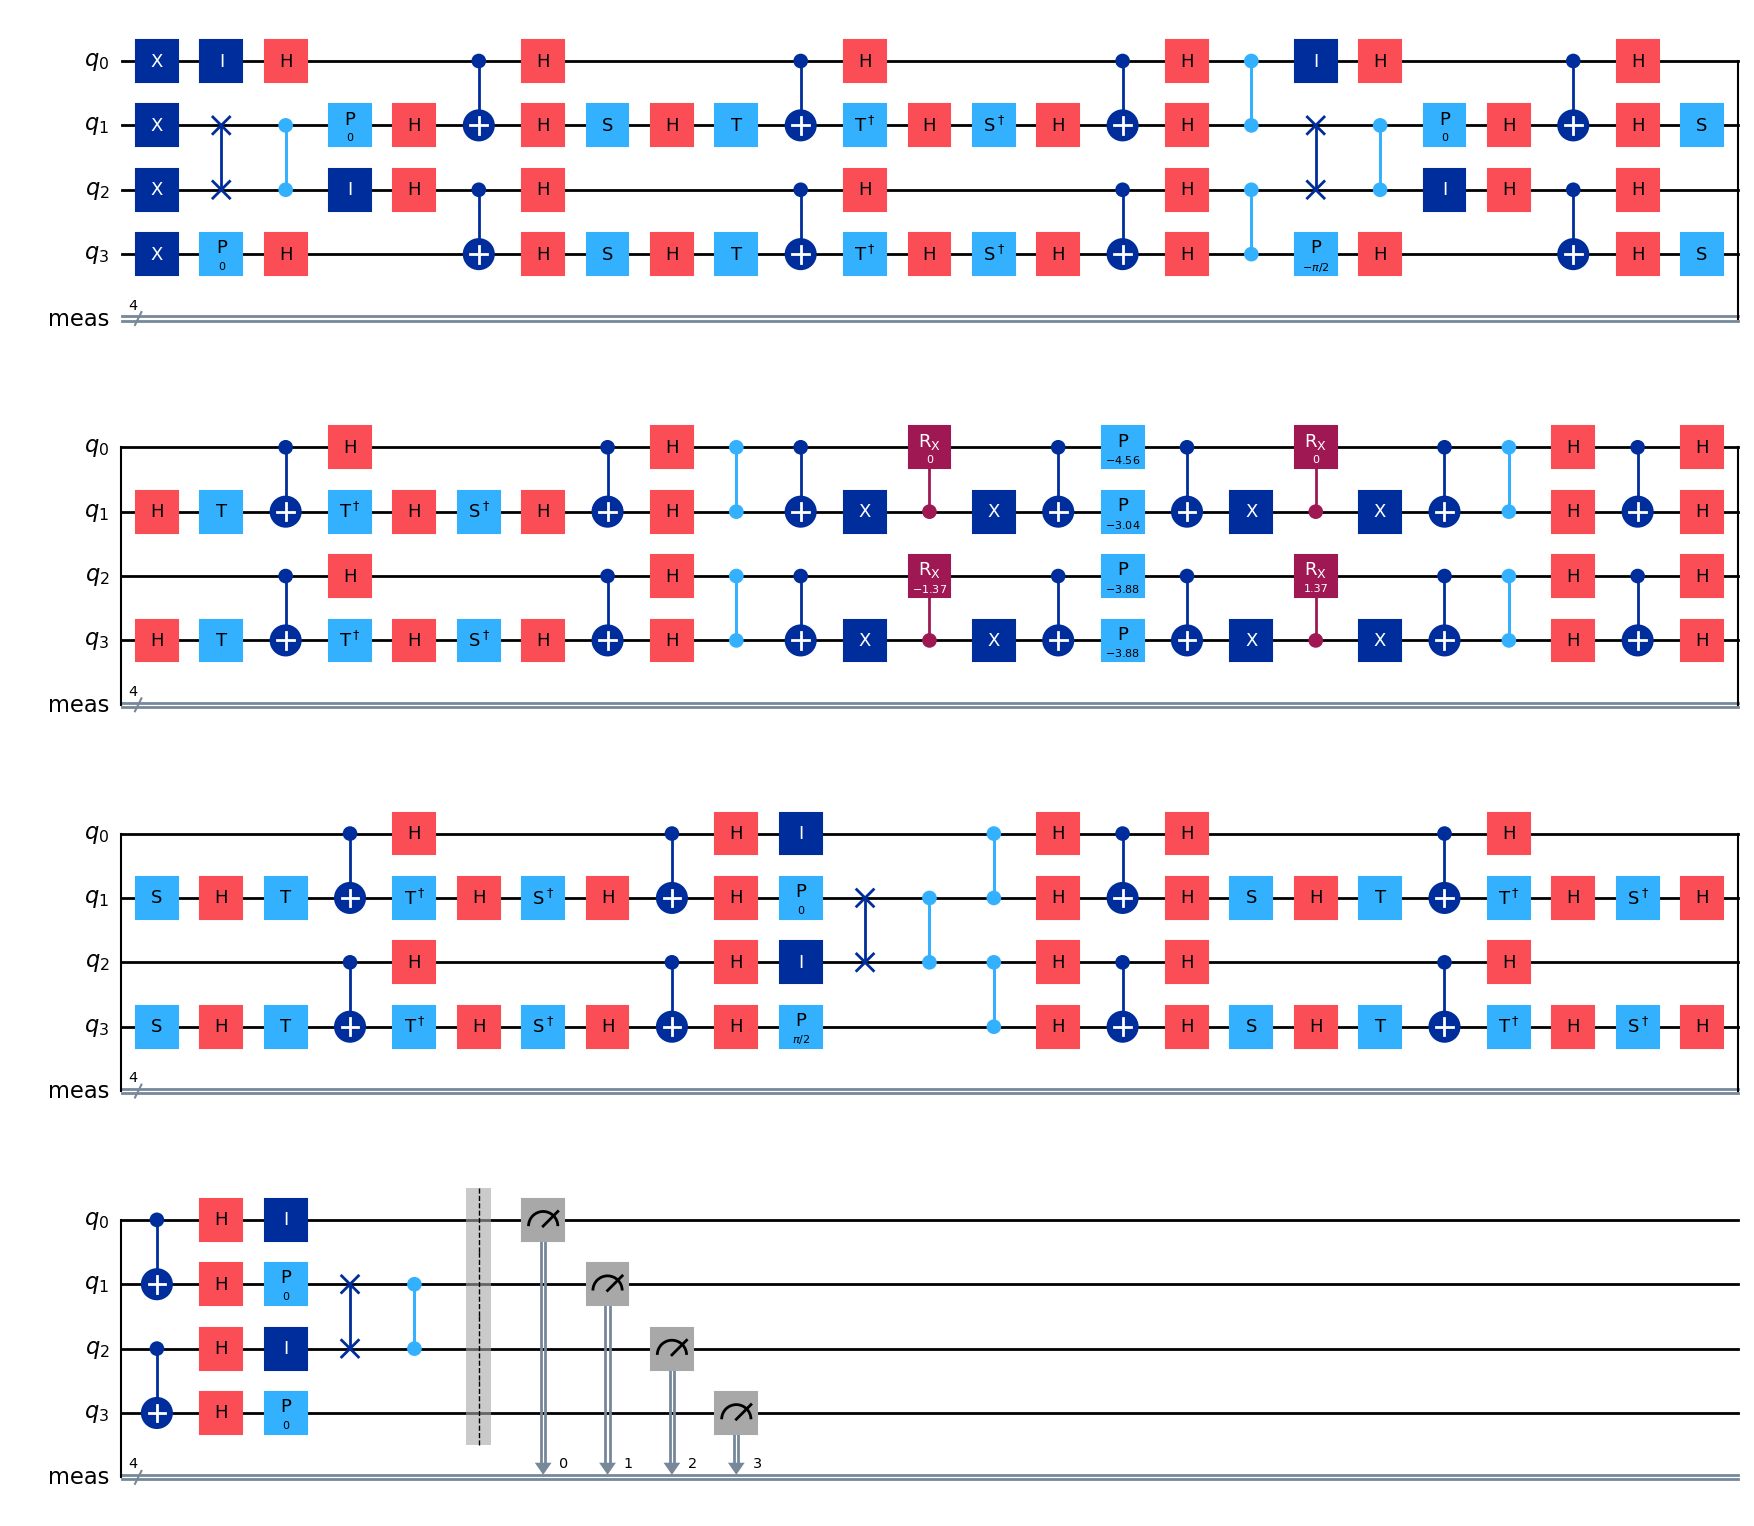

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from QGates_4_qubits import *
from magnetization import *
import matplotlib.pyplot as plt

n = 4
lamb = 0.2
lamb_tag = "0_2"
T = 2
delta_t = T/200
Mz_exact, t_axis_exact = get_data_Mz(T,delta_t,lamb)
t_axis = np.array([])
Mz = np.array([])
stdv_Mz = np.array([])
stdv_mean_Mz = np.array([])

for i in range(int(len(t_axis_exact)/10)):
    t_axis = np.append(t_axis,t_axis_exact[i*10])

for t in t_axis:
    qc = QuantumCircuit(n)
    #Preparation of the qubits in the state |1111>
    for i in range(n):
        qc.x(i)
    #Disentangling process
    apply_Udis(qc,n,lamb)
    #Application of the evolution operator
    ks = [0,2,1,-1]
    for i in range(n):
        E = get_E(n,ks[i],lamb)
        qc.p(-1*E*t,i)
    #Recalculation of the state in the original basis
    apply_Udis_inv(qc,n,lamb)

    #Definition of the simulator
    simulator = AerSimulator()
    qc = transpile(qc,simulator,optimization_level=0)
    qc.measure_all()
    
    #Simulation and memorization of the results
    result = simulator.run(qc,shots=2**10,memory=True,optimization_level=0).result()
    counts = result.get_counts()
    memory = result.get_memory()
    mz, stdv, stdv_mean = Mz_statistics(memory)
    Mz = np.append(Mz,mz)
    stdv_Mz = np.append(stdv_Mz,stdv)
    stdv_mean_Mz = np.append(stdv_mean_Mz,stdv_mean)

qc.draw("mpl")

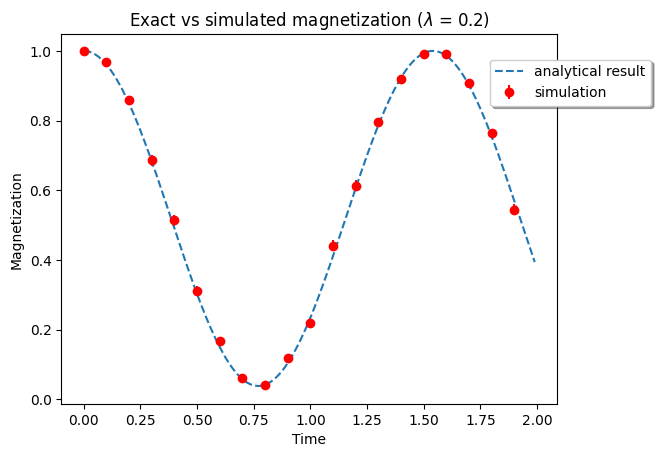

In [4]:
#Generation of the graph
plt.errorbar(t_axis,Mz,yerr=stdv_mean_Mz,fmt='ro',label="Aer simulator", markersize="4", elinewidth=2, ecolor="black", capsize=3)
plt.plot(t_axis_exact,Mz_exact,'--',label="analytical result")
plt.title("Exact vs simulated magnetization (" + r"$\lambda$" + " = " + str(lamb) + ")")
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.legend(bbox_to_anchor=(0.85,0.95),fancybox=True,shadow=True,fontsize=10)
plt.savefig("simulator/simulator_graph_lamb_" + lamb_tag, bbox_inches="tight")

plt.show()

#Storage of the results
f = open("simulator/times_lambda_"+lamb_tag+".txt", "w")
for t in t_axis:
    f.write(str(t)+"\n")
f.close()

f = open("simulator/times_lambda_"+lamb_tag+".txt", "w")
for t in t_axis:
    f.write(str(t)+"\n")
f.close()

f = open("simulator/Mz_lambda_"+lamb_tag+".txt", "w")
for mz in Mz:
    f.write(str(mz)+"\n")
f.close()

f = open("simulator/stdv_Mz_lambda_"+lamb_tag+".txt", "w")
for sigma in stdv_Mz:
    f.write(str(sigma)+"\n")
f.close()

f = open("simulator/stdv_mean_Mz_lambda_"+lamb_tag+".txt", "w")
for sigma in stdv_mean_Mz:
    f.write(str(sigma)+"\n")
f.close()

print("Task completed")